In [14]:
# OPTIONS FOR USER
fractions = False
channel = "tt"
analysis = "cpdecays"
year = "2018"
signal_scale = 1
norm_mc = False
mva_categories = None
embedding = True
ff = True
#signals = ["H_sm", "H_ps"]
signals = ["ggH", "qqH", "VH"]
#signals = ["ggH", "qqH"]
#signals = []
sig_kw = {"histtype": "step", "zorder": 1,}
leg_kw = {"offaxis": True, "fontsize": 9, "labelspacing":0.12,}
#mva_categories = [
#    "higgs_mvarhorho", 
#    "higgs_mvarho0a1", "higgs_mvaa1rho", "higgs_mvaa1a1", 
#    "higgs_mvapipi", "higgs_mvapirho", "higgs_mvapi0a1", "higgs_mvaa1pi"
#]
mva_categories = [
    "higgs",
    "jetFakes",
    "zttEmbed",
]

variables = [
    #"n_jets",
    #"svfit_mass",
    #"svfit_mass_err"
    #"dphi_residual_tt",
    #"shifted_dphi_jtt",
    #"smear_jet_delta",
    #"shifted_dphi_jtt_smear",
    #"residual_pt", "residual_phi",
    #"jpt20_sum_", "jphi20_sum_",
    #jdphi_gen_reco",
    #"sjdphi",
    #"sjdphi_sme#"residual_pt",
    #"dphi_residual_tt",
    #"jdphi_gen_reco",
    #"jpt20_sum",
    #"shifted_dphi_j20_tt",
    #"IC_15Mar2020_max_score",
    "IC_11May2020_max_score",
    #"IC_15Mar2020_max_index",
    #"m_vis",
    #"svfit_mass",
    ##"svfit_mass_err",
    #"pt_tt",
    #"pt_vis",
    #"pt_1",
    #"pt_2",
    #"eta_1",
    #"eta_2",
    #"tau_decay_mode_2",
    #"tau_decay_mode_1",
    #"mva_dm_2",
    #"mva_dm_1",
    #"met",
    #"n_jets",
    #"mjj",
    #"jdeta",
    #"jeta_1",
    ##"jeta_2",
    #"jpt_1",
    #"jpt_2",
    #"n_btag",
    #"n_loose_btag",
    #"dijetpt",
    
    #"m_vis",
    #"svfit_mass",
    #"pt_tt",
    #"pt_vis",
    #"pt_1",
    #"pt_2",
    #"mva_dm_2",
    #"mva_dm_1",
    #"met",
    #"n_jets",
    #"mjj",
    #"jeta_1",
    #"jdeta",
    #"jpt_1",
    #"sjdphi",
    #"jpt_2",
    #"jmva_1",
    #"NN_score",
    
    #"Bin number",

]

In [15]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%autoreload 2

In [17]:
from plotting import draw_1d, create_df, draw_signal_ratio
from plotting import var_kw, process_kw, nbins_kw
import oyaml as yaml
import matplotlib.pyplot as plt
import numpy as np

ch_kw = {}
with open("plot_kw.yaml", "r") as f:
    try:
        ch_kw = yaml.safe_load(f)
    except yaml.YAMLError as exc:
        print(exc)
# for including FF
if ff:
    ch_kw = {}
    with open("plot_kw_ff.yaml", "r") as f:
        try:
            ch_kw = yaml.safe_load(f)
        except yaml.YAMLError as exc:
            print(exc)
if embedding:
    for ch, proc in ch_kw.items():
        if ch in ["tt", "mt", "et", "em",]:
            proc["EmbedZTT"] = ["EmbedZTT"]
            del proc["ZTT"]

In [18]:
if embedding and ff:
    processes = ['data_obs', 'EmbedZTT', 'ZL', 'TTT', 'VVT', 'jetFakes', 'Wfakes']
elif ff:
    processes = ['data_obs', 'ZTT', 'ZL', 'TTT', 'VVT', 'jetFakes', 'EWKZ', 'Wfakes']
elif embedding:
    processes = ['data_obs', 'EmbedZTT', 'ZL', 'TTT', 'VVT', 'VVJ', 'W', 'QCD', 'ZJ']
else:
    processes = ['data_obs', 'ZTT', 'ZL', 'ZJ', 'TTT', 'TTJ', 'VVT', 'VVJ', 'W', 'QCD', 'EWKZ',]
if len(signals) > 0:
    processes.extend([
        "ggH_sm_htt125", "qqH_sm_htt125", "ZH_sm_htt125", "WH_sm_htt125",
        #"ggH_ps_htt125", "qqH_ps_htt125", "ZH_ps_htt125", "WH_ps_htt125",
    ])

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading Wfakes


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


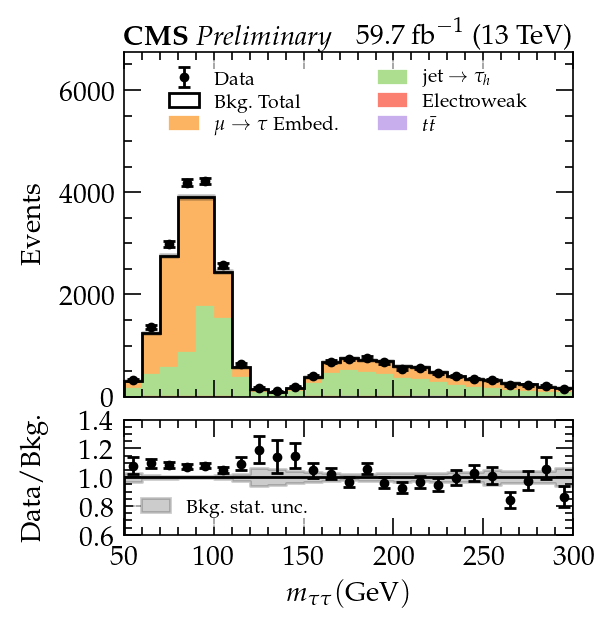

In [24]:
year = "2018"
for mva_cat in mva_categories:
    category = "inclusive"
    if mva_cat is not None:
        category = mva_cat
    if embedding and ff:
        category = f"{category}_ff_embed"
    elif embedding:
        category = f"{category}_embed"
    elif ff:
        category = f"{category}_ff"
    
    # take from run analyser
    #path = "/vols/build/cms/akd116/newest/run/CMSSW_8_0_25/src/UserCode/ICHiggsTauTau/Analysis/HiggsTauTau/"
    path = "/vols/build/cms/akd116/newest/run/CMSSW_8_0_25/src/UserCode/ICHiggsTauTau/Analysis/HiggsTauTauRun2/"
    
    if "higgs" in category:
        blind = True
    else:
        blind = False

    for plot_var in variables:
        datacard = "{}/output/{}/datacard_{}_{}_{}_{}.root".format(path, analysis, plot_var, category, channel, year)
        directory = "{}_{}".format(channel, category)
        
        df_plot = create_df(datacard, directory, channel, processes, ch_kw)
        draw_1d(
            df_plot, plot_var, channel, category, year, blind, 
            sigs=signals, signal_scale=signal_scale, ch_kw=ch_kw, process_kw=process_kw, 
            var_kw=var_kw, leg_kw=leg_kw, unrolled=False, mcstat=True, mcsyst=False,
            sm_bkg_ratio=True, #norm_bins=True,
            #logy=True,
            
        )

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading Wfakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ZH_sm_htt125
Loading WH_sm_htt125


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading Wfakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ZH_sm_htt125
Loading WH_sm_htt125


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading Wfakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ZH_sm_htt125
Loading WH_sm_htt125


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


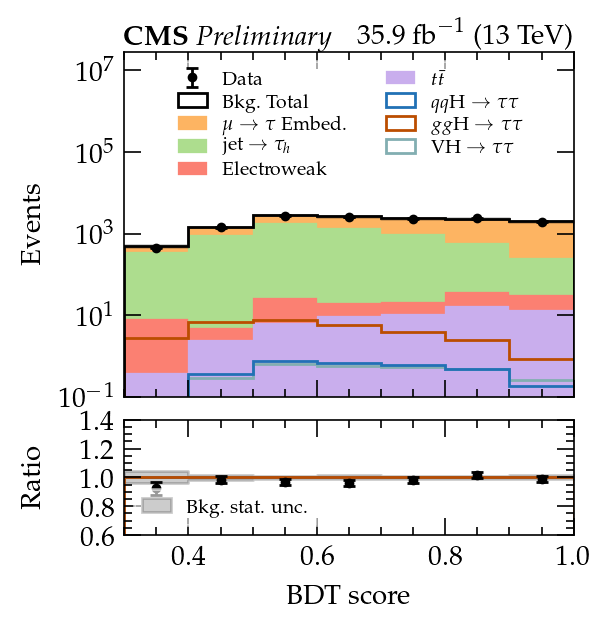

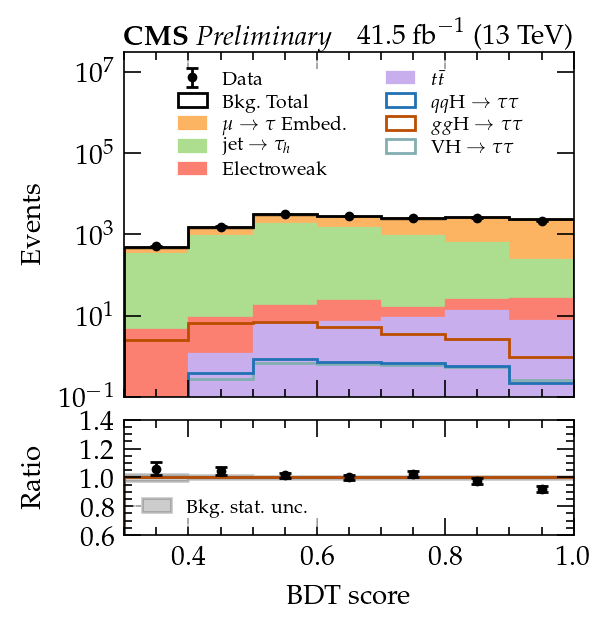

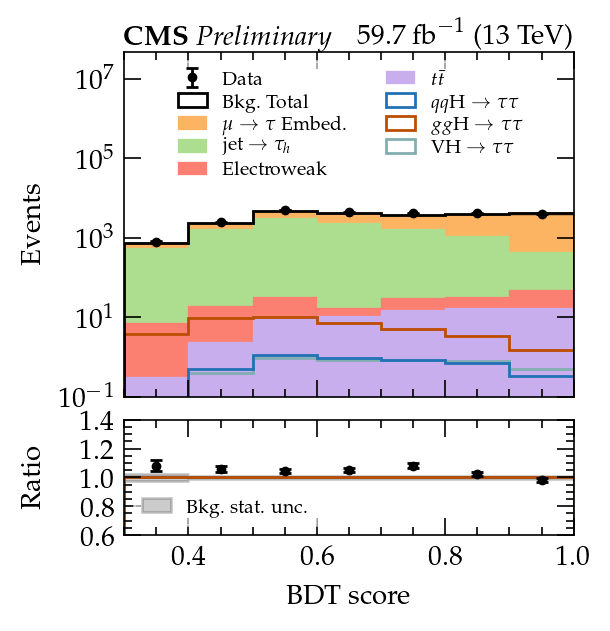

In [21]:
# NN score plots from datacards for DESY
channel = "tt"
for year in ['2016', '2017', '2018']:
    #category = f"mt_zttEmbed_{year}"
    category = f"tt_{year}_zttEmbed"
    
    if channel == "mt":
        folder_card = "DESY_19052020"
    elif channel == "tt":
        folder_card = "IC_15052020"
    # take from run analyser
    #path = "/vols/build/cms/akd116/newest/run/CMSSW_8_0_25/src/UserCode/ICHiggsTauTau/Analysis/HiggsTauTau/"
    path = (
        "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
        f"CombineHarvester/HTTSMCPDecays18/shapes/{folder_card}/{year}/htt_{channel}.inputs-sm-13TeV.root"
    )
    
    if "higgs" in category or "sig" in category:
        blind = True
    else:
        blind = False
    
    for plot_var in variables:
        datacard = path
        directory = category
            
        df_plot = create_df(datacard, directory, channel, processes, ch_kw)
        draw_1d(
            df_plot, plot_var, channel, category, year, blind, 
            sigs=signals, signal_scale=signal_scale, ch_kw=ch_kw, process_kw=process_kw, 
            var_kw=var_kw, leg_kw=leg_kw, unrolled=False, mcstat=True, mcsyst=False,
            #sig_ratio=True, 
            #norm_bins=True,
            sm_bkg_ratio=True,
            logy=True,
        )

Loading data_obs
Loading ZTT
Loading ZL
Loading ZJ
Loading TTT
Loading TTJ
Loading VVT
Loading VVJ
Loading W
Loading QCD
Loading EWKZ


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading ZTT
Loading ZL
Loading ZJ
Loading TTT
Loading TTJ
Loading VVT
Loading VVJ
Loading W
Loading QCD
Loading EWKZ


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading ZTT
Loading ZL
Loading ZJ
Loading TTT
Loading TTJ
Loading VVT
Loading VVJ
Loading W
Loading QCD
Loading EWKZ


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading ZTT
Loading ZL
Loading ZJ
Loading TTT
Loading TTJ
Loading VVT
Loading VVJ
Loading W
Loading QCD
Loading EWKZ


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading ZTT
Loading ZL
Loading ZJ
Loading TTT
Loading TTJ
Loading VVT
Loading VVJ
Loading W
Loading QCD
Loading EWKZ


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading ZTT
Loading ZL
Loading ZJ
Loading TTT
Loading TTJ
Loading VVT
Loading VVJ
Loading W
Loading QCD
Loading EWKZ


/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


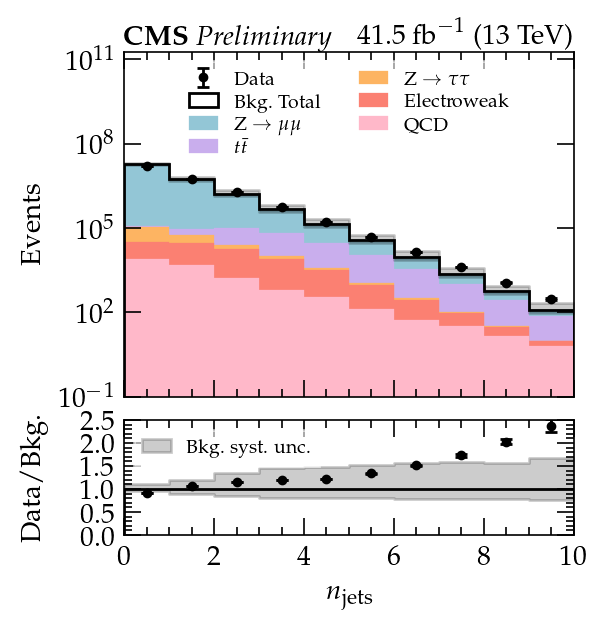

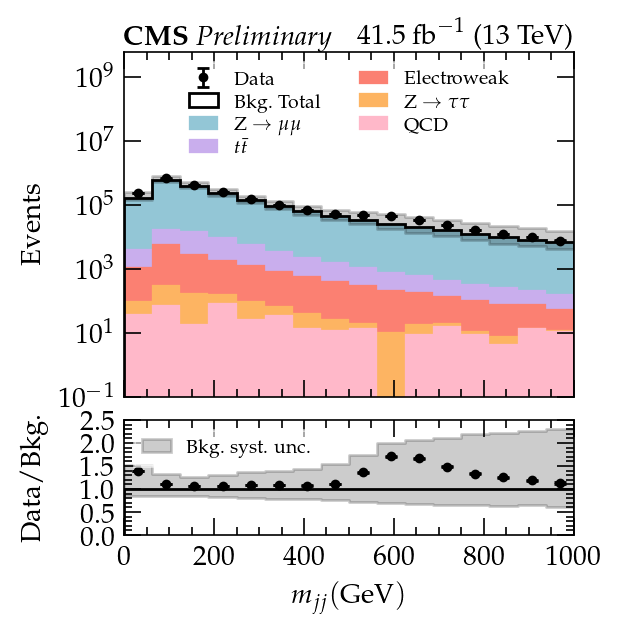

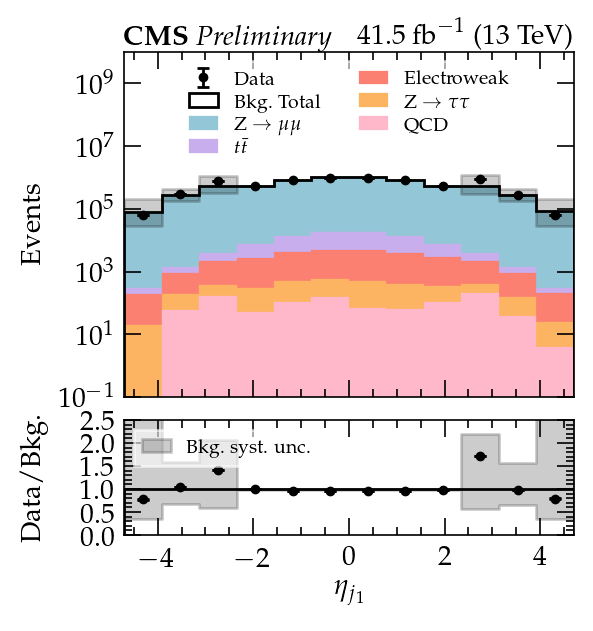

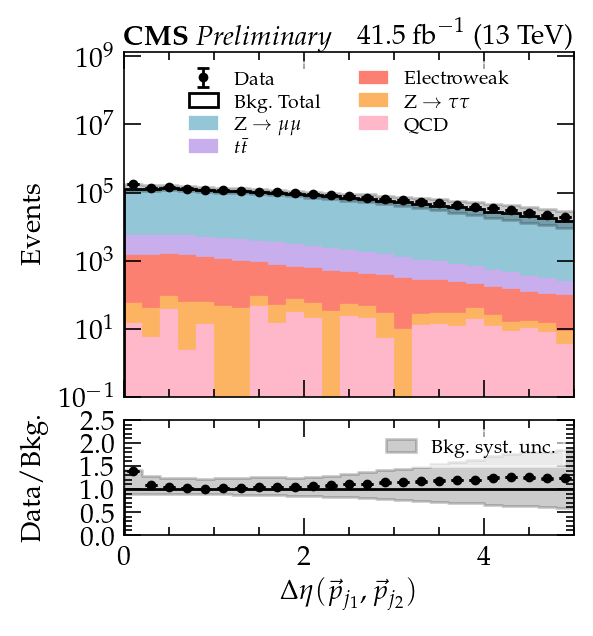

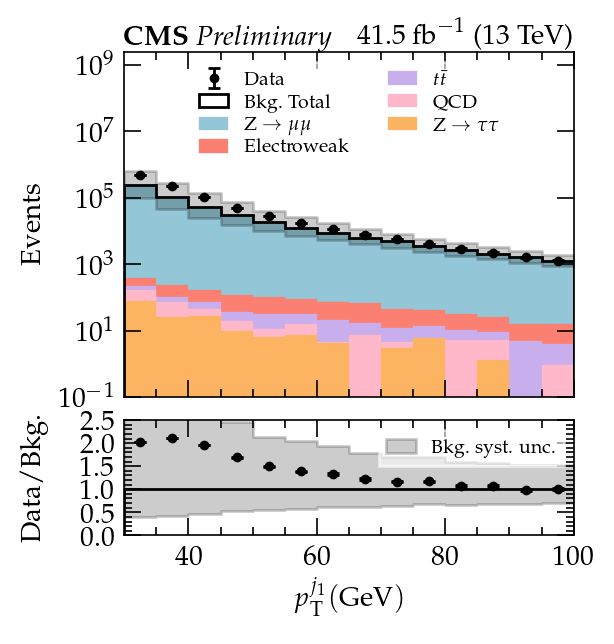

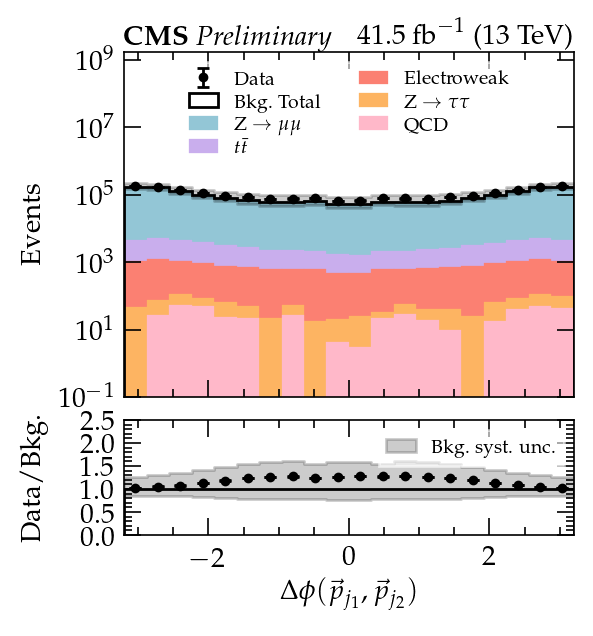

In [7]:
# with variation
#categories = ["etaUp2p5"]#, "etaUp2p75", "etaUp3p0", "etaUp5p0",]
category = "inclusive"
uncert_jes = [
    "CMS_scale_j_13TeV",
]
uncert_jer = [
    "CMS_res_j_13TeV",
]
uncert_tes = [
    "CMS_scale_t_1prong_13TeV", "CMS_scale_t_1prong1pizero_13TeV",
    "CMS_scale_t_3prong_13TeV", "CMS_scale_t_3prong1pizero_13TeV",
]
uncert_id = [
    "CMS_eff_t_pThigh_MVADM0_13TeV", "CMS_eff_t_pThigh_MVADM1_13TeV", "CMS_eff_t_pThigh_MVADM2_13TeV",
    "CMS_eff_t_pThigh_MVADM10_13TeV", "CMS_eff_t_pThigh_MVADM11_13TeV",
    #"CMS_eff_t_pTlow_MVADM0_13TeV", "CMS_eff_t_pTlow_MVADM1_13TeV", "CMS_eff_t_pTlow_MVADM2_13TeV",
    #"CMS_eff_t_pTlow_MVADM10_13TeV", "CMS_eff_t_pTlow_MVADM11_13TeV",
]
uncert_trg = [
    "CMS_eff_t_trg_MVADM0_13TeV", "CMS_eff_t_trg_MVADM1_13TeV", "CMS_eff_t_trg_MVADM2_13TeV",
    "CMS_eff_t_trg_MVADM10_13TeV", "CMS_eff_t_trg_MVADM11_13TeV",
]
uncerts = uncert_tes + uncert_id + uncert_trg
#uncerts = uncert_jes
# get the uncertainty for background processes only
if embedding and ff:
    category = f"{category}_ff_embed"
elif embedding:
    category = f"{category}_embed"
elif ff:
    category = f"{category}_ff"

# take from run analyser
path = "/vols/build/cms/akd116/newest/run/CMSSW_8_0_25/src/UserCode/ICHiggsTauTau/Analysis/HiggsTauTau/"

for plot_var in variables:
    #datacard = "{}/output/{}/datacard_{}_{}_{}_{}.root".format(path, analysis, plot_var, category, channel, year)
    #directory = "{}_{}".format(channel, category)
    
    #datacard = "{}/output/{}/datacard_{}_{}_pujid_eenoise_{}_{}.root".format(path, analysis, plot_var, category, channel, year)
    datacard = "{}/output/{}/datacard_{}_{}_alljets_eenoise_{}_{}.root".format(path, analysis, plot_var, category, channel, year)
    #directory = "{}_{}_pujid_eenoise".format(channel, category)
    directory = "{}_{}_alljets_eenoise".format(channel, category)
    #logy = False
    #if plot_var in ["n_jets",]:
    #    logy = True
    
    df_plot = create_df(datacard, directory, channel, processes, ch_kw, variations=uncert_jes)
    draw_1d(
        df_plot, plot_var, channel, category, year, blind=False, fractions=fractions,
        sigs=signals, sig_kw=sig_kw, signal_scale=signal_scale, ch_kw=ch_kw, process_kw=process_kw, 
        var_kw=var_kw, leg_kw=leg_kw, unrolled=False, mcstat=True, mcsyst=True,
        #sig_ratio=True, 
        #norm_bins=True,
        postfix="_alljets_eenoise",
        #postfix="_pujid_eenoise",
        #nbins=nbins_kw[channel][bin_number], 
        logy=True,
    )

In [ ]:
# with variation
#categories = ["etaUp2p5"]#, "etaUp2p75", "etaUp3p0", "etaUp5p0",]
year = "2018"
category = "inclusive"
uncert_jes = [
    "CMS_scale_j_13TeV",
]
uncert_jer = [
    "CMS_res_j_13TeV",
]
uncert_tes = [
    "CMS_scale_t_1prong_13TeV", "CMS_scale_t_1prong1pizero_13TeV",
    "CMS_scale_t_3prong_13TeV", "CMS_scale_t_3prong1pizero_13TeV",
]
uncert_id = [
    "CMS_eff_t_pThigh_MVADM0_13TeV", "CMS_eff_t_pThigh_MVADM1_13TeV", "CMS_eff_t_pThigh_MVADM2_13TeV",
    "CMS_eff_t_pThigh_MVADM10_13TeV", "CMS_eff_t_pThigh_MVADM11_13TeV",
    #"CMS_eff_t_pTlow_MVADM0_13TeV", "CMS_eff_t_pTlow_MVADM1_13TeV", "CMS_eff_t_pTlow_MVADM2_13TeV",
    #"CMS_eff_t_pTlow_MVADM10_13TeV", "CMS_eff_t_pTlow_MVADM11_13TeV",
]
uncert_trg = [
    "CMS_eff_t_trg_MVADM0_13TeV", "CMS_eff_t_trg_MVADM1_13TeV", "CMS_eff_t_trg_MVADM2_13TeV",
    "CMS_eff_t_trg_MVADM10_13TeV", "CMS_eff_t_trg_MVADM11_13TeV",
]
uncerts = uncert_tes + uncert_id + uncert_trg
#uncerts = uncert_jes
# get the uncertainty for background processes only
if embedding and ff:
    category = f"{category}_ff_embed"
elif embedding:
    category = f"{category}_embed"
elif ff:
    category = f"{category}_ff"

# take from run analyser
path = "/vols/build/cms/akd116/newest/run/CMSSW_8_0_25/src/UserCode/ICHiggsTauTau/Analysis/HiggsTauTauRun2/"

for plot_var in variables:
    datacard = "{}/output/{}/datacard_{}_{}_{}_{}.root".format(path, analysis, plot_var, category, channel, year)
    directory = "{}_{}".format(channel, category)
    
    df_plot = create_df(datacard, directory, channel, processes, ch_kw, variations=["CMS_scale_j_FlavorQCD_13TeV"])
    draw_1d(
        df_plot, plot_var, channel, category, year, blind=False, fractions=fractions,
        sigs=signals, sig_kw=sig_kw, signal_scale=signal_scale, ch_kw=ch_kw, process_kw=process_kw, 
        var_kw=var_kw, leg_kw=leg_kw, unrolled=False, mcstat=True, mcsyst=True,
        #sig_ratio=True, 
        #norm_bins=True,
        logy=True,
    )

# To look at variation sum_w up/down

In [110]:
# with variation
#categories = ["etaUp2p5"]#, "etaUp2p75", "etaUp3p0", "etaUp5p0",]
year = "2017"
category = "inclusive"
uncert_jes = [
    "CMS_scale_j_13TeV",
]
uncert_jer = [
    "CMS_res_j_13TeV",
]
uncert_tes = [
    "CMS_scale_t_1prong_13TeV", "CMS_scale_t_1prong1pizero_13TeV",
    "CMS_scale_t_3prong_13TeV", "CMS_scale_t_3prong1pizero_13TeV",
]
uncert_id = [
    "CMS_eff_t_pThigh_MVADM0_13TeV", "CMS_eff_t_pThigh_MVADM1_13TeV", "CMS_eff_t_pThigh_MVADM2_13TeV",
    "CMS_eff_t_pThigh_MVADM10_13TeV", "CMS_eff_t_pThigh_MVADM11_13TeV",
    #"CMS_eff_t_pTlow_MVADM0_13TeV", "CMS_eff_t_pTlow_MVADM1_13TeV", "CMS_eff_t_pTlow_MVADM2_13TeV",
    #"CMS_eff_t_pTlow_MVADM10_13TeV", "CMS_eff_t_pTlow_MVADM11_13TeV",
]
uncert_trg = [
    "CMS_eff_t_trg_MVADM0_13TeV", "CMS_eff_t_trg_MVADM1_13TeV", "CMS_eff_t_trg_MVADM2_13TeV",
    "CMS_eff_t_trg_MVADM10_13TeV", "CMS_eff_t_trg_MVADM11_13TeV",
]
uncerts = uncert_tes + uncert_id + uncert_trg
#uncerts = uncert_jes
# get the uncertainty for background processes only
if embedding and ff:
    category = f"{category}_ff_embed"
elif embedding:
    category = f"{category}_embed"
elif ff:
    category = f"{category}_ff"

# take from run analyser
#path = "/vols/build/cms/akd116/newest/run/CMSSW_8_0_25/src/UserCode/ICHiggsTauTau/Analysis/HiggsTauTauRun2/"
path = (
    "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/CombineHarvester/HTTSMCPDecays18/"
    "shapes/IC_15052020/2017/htt_tt.inputs-sm-13TeV-mergeXbins.root"
)

for plot_var in variables:
    #datacard = "{}/output/{}/datacard_{}_{}_{}_{}.root".format(path, analysis, plot_var, category, channel, year)
    #directory = "{}_{}".format(channel, category)
    datacard = path
    directory = "tt_2017_higgs_Pi_A1_Mixed"
    
    df_plot = create_df(datacard, directory, channel, processes, ch_kw, variations=["CMS_res_j_13TeV"])
    #draw_1d(
    #    df_plot, plot_var, channel, category, year, blind=False, fractions=fractions,
    #    sigs=signals, sig_kw=sig_kw, signal_scale=signal_scale, ch_kw=ch_kw, process_kw=process_kw, 
    #    var_kw=var_kw, leg_kw=leg_kw, unrolled=False, mcstat=True, mcsyst=True,
    #    #sig_ratio=True, 
    #    #norm_bins=True,
    #    logy=True,
    #)

Loading data_obs
Loading EmbedZTT
Not found CMS_res_j_13TeV for EmbedZTT: skipping
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Not found CMS_res_j_13TeV for jetFakes: skipping
Loading Wfakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ZH_sm_htt125
Loading WH_sm_htt125


In [111]:
tdf

,,sum_w,sum_w_up,sum_w_down,sum_ww,sum_ww_down,sum_ww_up
binvar0,binvar1,,,,,,
0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


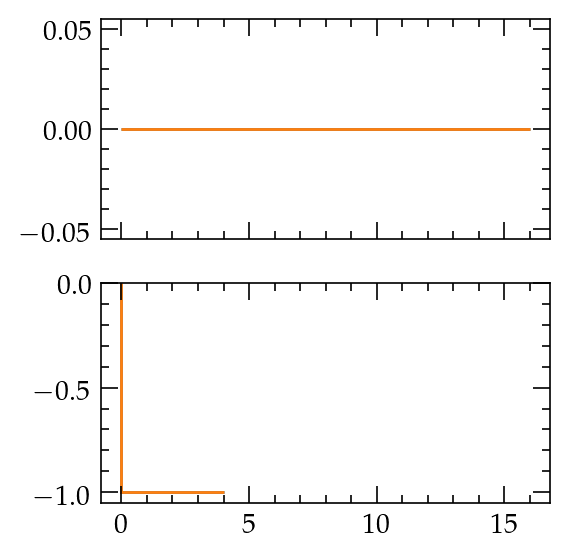

In [112]:
fig, ax = plt.subplots(
    figsize=(2.9, 3.2), dpi=200,
    nrows=2, ncols=1,
    sharex=True, sharey=False,
)
binvar0 = df_plot.index.get_level_values("binvar0").unique().values
binvar1 = df_plot.index.get_level_values("binvar1").unique().values
binning = np.array(list(binvar0)+[binvar1[-1]])
tdf = df_plot.loc[("ZL",)]
#tdf = df_plot.groupby(["binvar0","binvar1"]).sum()
ax[0].hist(
    binvar0, bins=binning, 
    weights=tdf["sum_w_up"],
    histtype='step',
)
ax[0].hist(
    binvar0, bins=binning, 
    weights=tdf["sum_w_down"],
    histtype='step',
)
ax[1].hist(
    binvar0, bins=binning, 
    weights=tdf["sum_w_up"]/tdf["sum_w"]-1,
    histtype='step',
)
ax[1].hist(
    binvar0, bins=binning, 
    weights=tdf["sum_w_down"]/tdf["sum_w"]-1,
    histtype='step',
)
fig.savefig("plots/check_jer_electroweak.pdf",bbox_inches='tight')

In [113]:
tdf

,,sum_w,sum_w_up,sum_w_down,sum_ww,sum_ww_down,sum_ww_up
binvar0,binvar1,,,,,,
0.0,1.0,0.403042,0.0,0.0,0.162443,0.324885,0.324885
1.0,2.0,0.403042,0.0,0.0,0.162443,0.324885,0.324885
2.0,3.0,0.403042,0.0,0.0,0.162443,0.324885,0.324885
3.0,4.0,0.403042,0.0,0.0,0.162443,0.324885,0.324885
4.0,5.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
5.0,6.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
6.0,7.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
7.0,8.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
8.0,9.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
